In [1]:
import pandas as pd
import numpy as np
from INDOML.INDOML.model.supervised import DecisionTree 
from INDOML.INDOML.model.Ensemble import RandomForest 
from INDOML.INDOML.pre_proceesing.EDA import Visualisasi
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('seeds_dataset.csv',delimiter="\t")
df

,Area,Perimeter,Compactness,Kernel_len,Kernel_width,Assymetry,Groove_len,Category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
vis = Visualisasi(df)

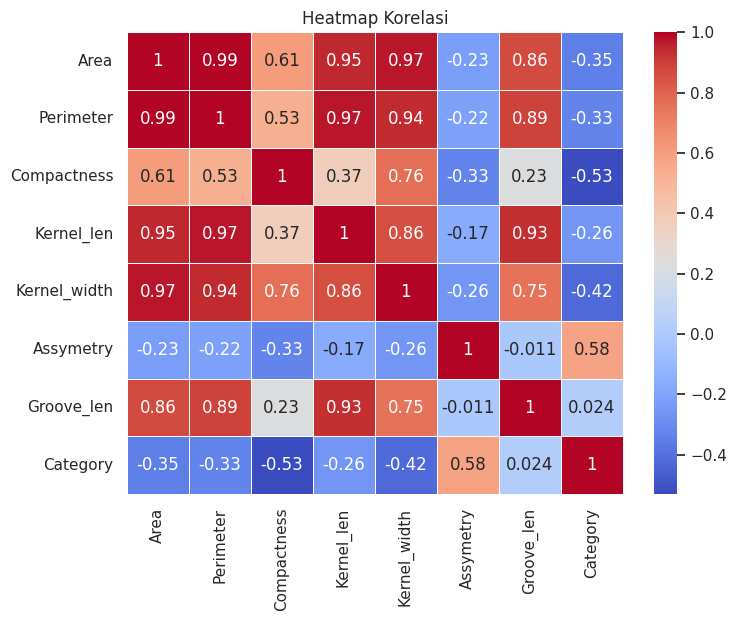

In [4]:
vis.heatmapkor()

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


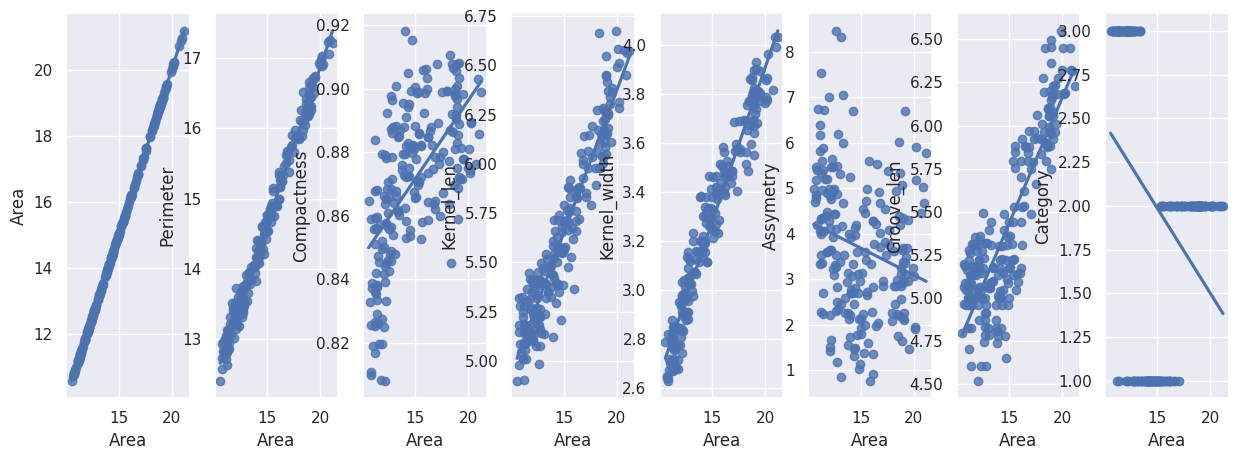

In [5]:
vis.regplot('Area')

In [6]:
y = df[df.columns[-1]]
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: Category, Length: 210, dtype: int64

In [7]:
X = X.to_numpy()
X

NameError: name 'X' is not defined

In [ ]:
y = y.to_numpy()
y

In [ ]:
colom = list(df.columns)
colom

In [ ]:
dt = DecisionTree(10)

In [ ]:
dt.fit(X,y)

In [ ]:
y_pred= dt.fit_predict(X,y)

In [ ]:
dt.score_accuracy(y_pred,y)

In [ ]:
rf = RandomForest(4,2,random_state=1304211035,n_tree=20)

In [ ]:
X.shape

In [ ]:
pred = rf.fit_predict(X,y,colom)
pred

In [ ]:
rf.score_accuracy(pred,y)

In [ ]:
dts = DecisionTreeClassifier(max_depth=2)

In [ ]:
dts.fit(X,y)

In [ ]:
y_pred_sk = dts.predict(X)

In [ ]:
dt.score_accuracy(y_pred_sk,y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from INDOML.INDOML.model.Ensemble import BoostingRegressi
from sklearn.ensemble import GradientBoostingRegressor

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_boosting_regressor_linear(X, y, n_estimators=100, learning_rate=0.1):
    # Step 1: Inisialisasi model
    predictions = np.mean(y)
    print(predictions)  # Rata-rata target sebagai nilai awal

    for i in range(n_estimators):
        # Step 2: Hitung residuals
        residuals = y - predictions

        # Step 3: Fit weak learner (regresi linear)
        linear_model = LinearRegression()
        linear_model.fit(X, residuals.reshape(-1, 1))
        

        # Step 4: Hitung koefisien (learning rate)
        coef = learning_rate

        # Step 5: Perbarui model
        predictions += coef * linear_model.predict(X).squeeze()
        

        # Dapat ditambahkan early stopping berdasarkan kondisi tertentu

    return predictions

# Contoh penggunaan
# Misalnya, X dan y adalah data dan target Anda
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + np.random.randn(100)  # Contoh hubungan linier dengan noise

# Panggil fungsi gradient_boosting_regressor_linear
predictions_linear = gradient_boosting_regressor_linear(X, y, n_estimators=200, learning_rate=0.2)
pred = BoostingRegressi(0.2,200).fit_predict(X,y)
obj = GradientBoostingRegressor(init=LinearRegression()).fit(X,y)
pred_2 = obj.predict(X)
GradientBoostingRegressor()
# Hitung MSE untuk mengevaluasi kinerja model
mse_linear = mean_squared_error(y, predictions_linear)
mse_linear2 = mean_squared_error(y,pred)
mse_linear3 = mean_squared_error(y,pred_2)
print(f"Mean Squared Error (Linear): {mse_linear}")
print(f"Mean Squared Error (Linear): {mse_linear2}")
print(f"Mean Squared Error (Linear): {mse_linear3}")

1.1399466175069244
Mean Squared Error (Linear): 0.9308628441256969
Mean Squared Error (Linear): 1.1594778651696713
Mean Squared Error (Linear): 0.19276139505078807


In [ ]:
y

array([ 1.40721974,  1.04305322,  2.34335538,  0.96546645,  1.08719773,
        0.04575491,  1.37731628,  2.21381743, -0.49978636,  0.03364384,
        1.8631594 ,  2.51615774,  0.4813813 ,  2.04893397,  0.63064318,
       -0.05426811,  0.76950744,  2.93288679,  0.94909462,  0.23492524,
        0.81637676,  0.86076906, -0.43907888,  0.53265798, -0.44861221,
        0.74414871, -0.22097736, -1.02921568,  2.67247178,  0.57257438,
        0.56467945,  1.59387719,  1.06280475,  1.21146505,  1.20990438,
        0.85191073,  0.53715223, -1.45151252,  0.68825322,  2.06684302,
        3.32334002,  1.42458671,  1.5048434 ,  3.41123998,  0.24470392,
       -0.82383483, -0.27024759,  1.2241659 , -1.17496555, -1.22855004,
        2.2157862 ,  0.93690678,  1.63023046, -1.40327201, -0.73116932,
        0.03819998, -0.03200704,  1.59871608,  0.43732751, -1.70213367,
        2.54157143,  0.20589816, -1.78195996,  0.88906072,  3.71843141,
        0.18283791, -0.5285221 ,  0.90226363,  1.36429343,  0.76

In [ ]:
y.shape